# Predictions on growth of confirmed Novel Coronavirus (2019-nCoV) cases in countries 
                      By Bohan updated on March 21, 2020  
## Goal: Make an educated guess on when the spread of the novel coronavirus will stabilize (i.e. when the things will get better) in different countries

## Method: 
1. Use the data from China as an example to create logistic models for different countries 
2. Use R^2 to evaluate goodness of fit
3. Use inflection point to predict the turning point (i.e. when the number of newly confirmed cases per day will start to decrease
4. Use 99.9% of the top horizontal asymptote value to predict when the situation wil stablize (i.e. the number of newly confirmed cases is closed to zero)

## Data: 
Publically available source from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE  
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv


## Disclaimer: 
### 1. The model assumes that everything stays constant, so the conclusions will be affected both positively and negatively by dramatic changes such as new travel restictions, shortage of health care supplies, ect
### 2. Only confirmed cases were included, so the result depends number of tests done and it does not necessarily reflect the actual infected population in each countries
### 3. Any inaccuracies in the data source can affect predictions
### 4. I intend to update every week and conclusion may be different in each update (due to new models being generated from latest data)


## Summary: 
### 1. The logistic model was applied to 26 countries
### 2. Mean turning point for these countries is on 2020-03-16
### 3. Mean CurveTop for these countries is on 2020-04-08
### 4. The numbers of confirmed cases in Germany and Italy may exceed those in China, but there are uncertainties because the numbers in China is expected to rise again due to people going back to China from other countries.
  

In [1]:
import numpy as np;  # useful for many scientific computing in Python
import pandas as pd; # primary data structure library
import scipy as sp; # for statistical tests
import matplotlib.pyplot as plt; # for plotting
import seaborn as sns; # for heatmaps

# add custom converters for timestamps when plotting
from pandas.plotting import register_matplotlib_converters
register_matplotlib_converters()

In [2]:
# data from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

df = pd.read_csv('time_series_19-covid-Confirmed.csv'); # import file
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
0,NaN,Thailand,15.0000,101.0000,2,3,5,7,8,8,...,59,70,75,82,114,147,177,212,272,322
1,NaN,Japan,36.0000,138.0000,2,1,2,2,4,4,...,639,639,701,773,839,825,878,889,924,963
2,NaN,Singapore,1.2833,103.8333,0,1,3,3,4,5,...,178,178,200,212,226,243,266,313,345,385
3,NaN,Nepal,28.1667,84.2500,0,0,0,1,1,1,...,1,1,1,1,1,1,1,1,1,1
4,NaN,Malaysia,2.5000,112.5000,0,0,0,3,4,4,...,149,149,197,238,428,566,673,790,900,1030


## Create China data frame as an example
The location data and Province/State data will be ignore 

In [3]:
China = df[df['Country/Region'] == 'China'];
China.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,3/11/20,3/12/20,3/13/20,3/14/20,3/15/20,3/16/20,3/17/20,3/18/20,3/19/20,3/20/20
154,Hubei,China,30.9756,112.2707,444,444,549,761,1058,1423,...,67773,67781,67786,67790,67794,67798,67799,67800,67800,67800
158,Guangdong,China,23.3417,113.4244,26,32,53,78,111,151,...,1356,1356,1356,1356,1360,1361,1364,1370,1378,1395
159,Henan,China,33.8820,113.6140,5,5,9,32,83,128,...,1273,1273,1273,1273,1273,1273,1273,1273,1273,1273
160,Zhejiang,China,29.1832,120.0934,10,27,43,62,104,128,...,1215,1215,1215,1227,1231,1231,1232,1232,1233,1234
161,Hunan,China,27.6104,111.7088,4,9,24,43,69,100,...,1018,1018,1018,1018,1018,1018,1018,1018,1018,1018


In [4]:
# calculate sums for the entire country
China_sum = China.iloc[:,4:].sum(axis=0);

## Create logistic model as
## f(x) = a / (1 + e^(-c * (x - d)) ) + b
    where x is time, 
    f(x) is Percentage confirmed cases over entire population,
    a,b,c,d are fitting parameters

### The inflection point is at x =  -ln( abs(1 - 2a/(a-b) )) / c +d
### The horizontal asymptote is f(x) = a + b

In [5]:
# create logistic function
def func(x, a,b,c,d): 
    return a / (1. + np.exp(-c * (x - d))) + b

In [6]:
 # import curve_fit function and fit the curve
from scipy.optimize import curve_fit;
# repeate fitting three time using consecutive parameters
popt, pcov = curve_fit(func, np.arange(len(China_sum)), China_sum.to_numpy(), p0=[China_sum.iloc[-1], 0,  0,  0]);
popt, pcov = curve_fit(func, np.arange(len(China_sum)), China_sum.to_numpy(), p0=popt);
popt, pcov = curve_fit(func, np.arange(len(China_sum)), China_sum.to_numpy(), p0=popt);
y_fit = func(np.arange(len(China_sum)), popt[0],popt[1],popt[2],popt[3]);

In [7]:
# create a function to plot data
def p_model(s, y_fit, name):
    # s: pandas series containing number of confirmed cases
    # name: name of country (str)
    plt.figure(figsize=(20,15));
    plt.plot(s.to_numpy(),'b', label=name);
    plt.plot(y_fit,'r--', label='Simulated');
    plt.legend(fontsize=20);
    plt.ylabel('Number of confirmed cases over entire population', fontsize=20);
    plt.title('Cumulative number of confirmed cases per day', fontsize=20);
    plt.xlabel('Days after first report', fontsize=20);
    plt.show();

In [8]:
# create a function to plot data
def p_model(s, y_fit, name, fst):
    # s: pandas series containing number of confirmed cases
    # y_fit: 1-d array containing model data 
    # name: name of country (str)
    # fst: first day of the data set (str)
    
    plt.figure(figsize=(20,15));
    plt.plot(pd.to_datetime(fst)+pd.to_timedelta(np.arange(len(s)), unit='day'), s.to_numpy(),'b', label=name);
    plt.plot(pd.to_datetime(fst)+pd.to_timedelta(np.arange(len(y_fit)), unit='day'), y_fit,'r--', label='Simulated');
    plt.legend(fontsize=20);
    plt.ylabel('Number of confirmed cases over entire population', fontsize=20);
    plt.title('Cumulative number of confirmed cases per day', fontsize=20);
    plt.xlabel('Date', fontsize=20);
    plt.show();

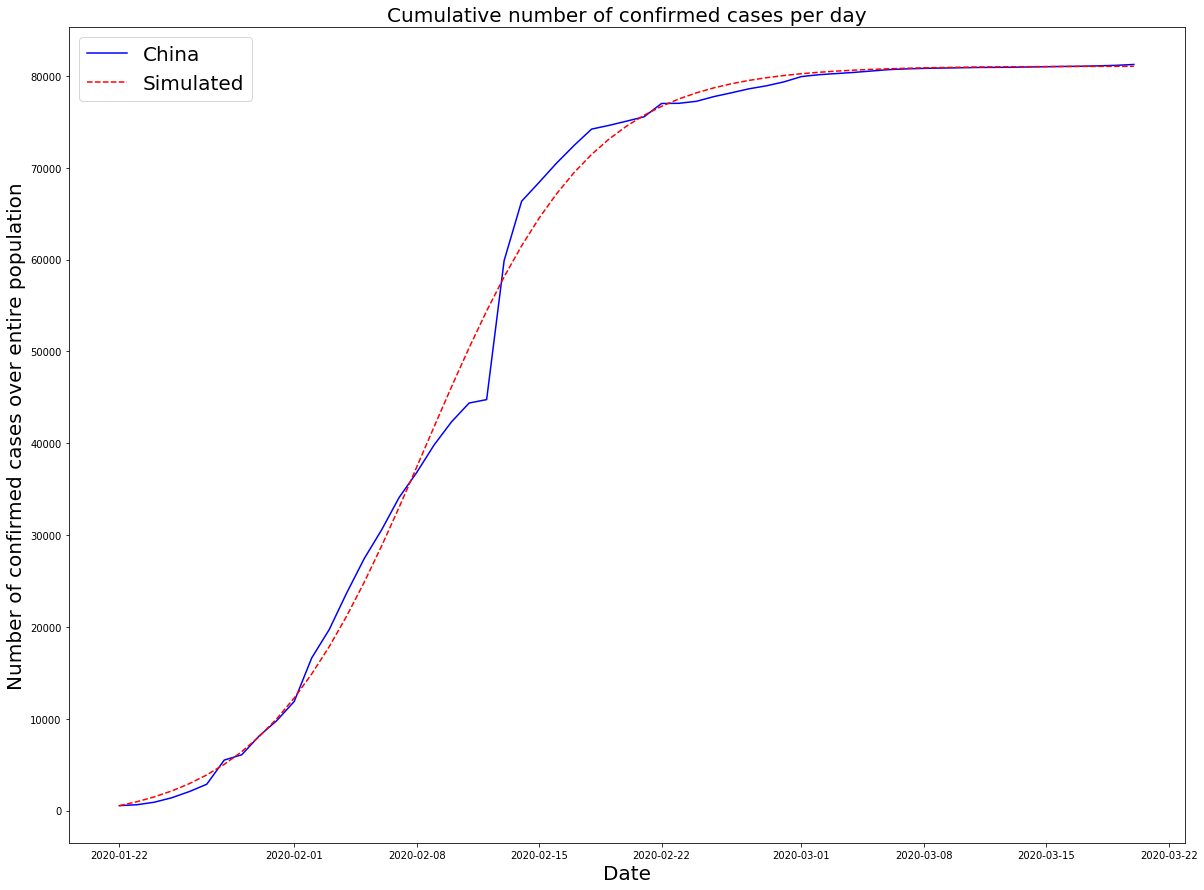

In [9]:
# plot for China
p_model(China_sum, y_fit, 'China', China_sum.index[0])

In [10]:
# define the function to caculate R^2 using residual sum of squares
def r_square(y, y_fit):
    # residual sum of squares
    ss_res = np.sum((y - y_fit) ** 2)

    # total sum of squares
    ss_tot = np.sum((y - np.mean(y)) ** 2)

    # r-squared
    r2 = 1 - (ss_res / ss_tot)
    return r2

In [11]:
# The closer the R^2 is to 1, the better the fitting
print('R^2 = ', r_square(China_sum.to_numpy(), y_fit))

R^2 =  0.9953664453217967


In [12]:
# find % when the confirmed population stablized on March 18
# the inflection point is at fp = a/2
# after solving for x in the logistic equation:
# x = -ln(abs(1-a/(fb-b)))/c + d = -ln(abs(1-2a/(a-b)))/c + d
# caculate this date:
iday = -np.log(abs(1-2*popt[0]/(popt[0]-popt[1])))/popt[2] + popt[3];
print('The day reaches the turning point is on: ',
      pd.to_datetime(China_sum.index[0]) + pd.to_timedelta(iday, unit='day'));

The day reaches the turning point is on:  2020-02-08 20:38:04.041945600


In [13]:
# top horizontal horizontal asymptotes is a + b (popt[0] + popt[1])
# time to reach 99.9% of asymptote is at y_hor = 0.999*(a + b)
# after solving for x in the logistic equation:
# x = -ln(abs(1-a/(y_hor-b)))/c + d
# caculate this date:
dday = -np.log(abs(1-popt[0]/(0.999*(popt[0]+popt[1])-popt[1])))/popt[2] + popt[3];
print('The day reaches the top of the curve is on: ',
      pd.to_datetime(China_sum.index[0]) + pd.to_timedelta(dday, unit='day'));
print('The total number of confirmed cases is ', popt[0]+popt[1]);

The day reaches the top of the curve is on:  2020-03-11 20:11:29.185987200
The total number of confirmed cases is  81064.17724968953


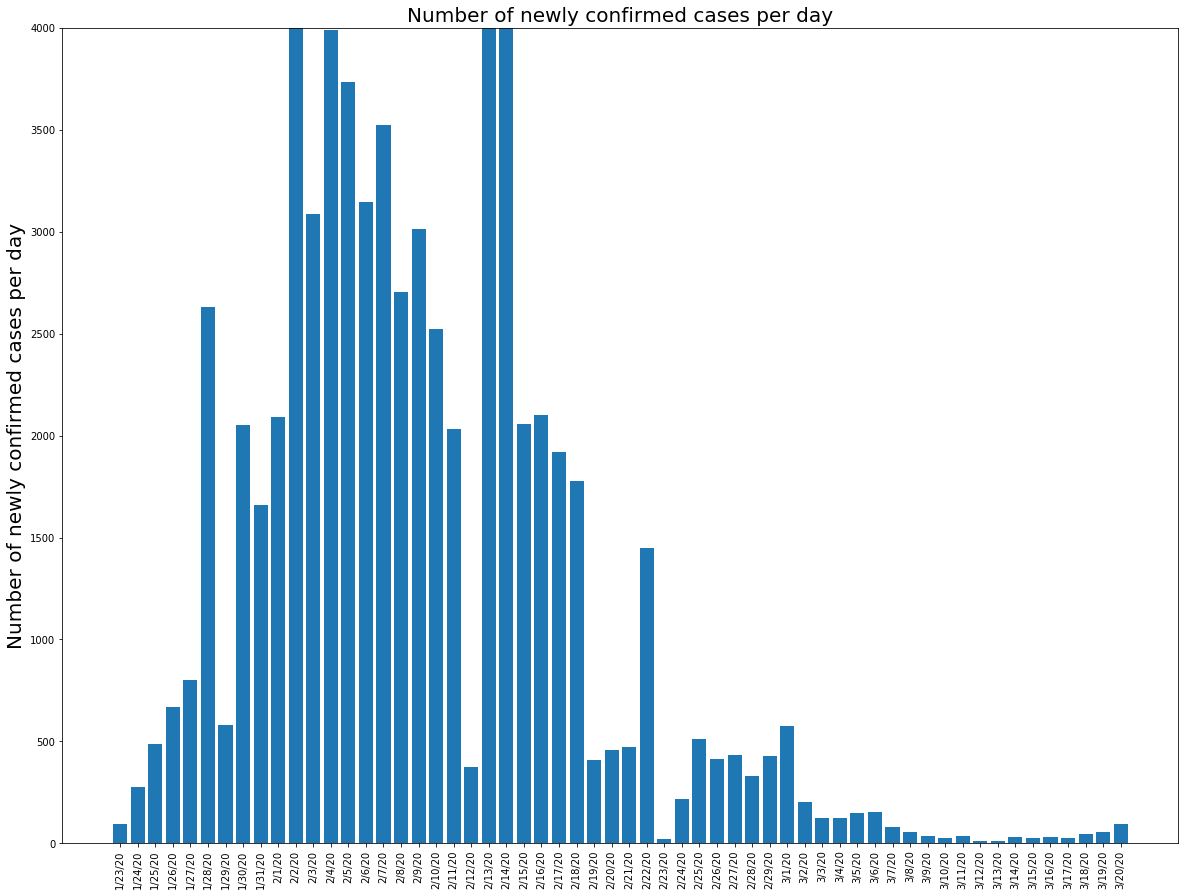

In [14]:
# plot number of newly confirmed cases
plt.figure(figsize=(20,15));
plt.bar(China_sum.index[1:], China_sum.to_numpy()[1:]-China_sum.to_numpy()[:-1]);
plt.xticks(rotation='vertical');
plt.ylim((0,4000));
plt.ylabel('Number of newly confirmed cases per day', fontsize=20);
plt.title('Number of newly confirmed cases per day', fontsize=20);

## Summary:
1. As shown in the bar graph, the number of newly confirmed cases did decrease after 2/7/2020 as perdicted by the model but it increased again on 2/13/2020.
2. After 3/8/2020, the number of newly confirmed cases stablized which closely matches the modelperdiction: 3/11/2020.  
3. Therefore, the model is suitable for making guesses.

# Predictions on Other countries

In [15]:
popt, pcov = curve_fit(func, np.arange(len(China_sum)), China_sum.to_numpy(), p0=[China_sum.iloc[-1], 0,  0,  0]);
# fitting parameters for China
popt_china = popt;
# for storing data
POPT = [];
PCOV = [];
R2 = [];
Iday = [];
Dday = [];
NAME = [];
TotalC = [];

# I will ignore number of confirmed cases below 400
# because good model cannot be generated from small sample size
countries = df['Country/Region'].unique()
for ct in np.arange(len(countries)):
    
    # caculate sums per country
    df1 = df[df['Country/Region'] == countries[ct]].iloc[:, 4:].sum(axis=0);
    
    # I will ignore number of confirmed cases below 400
    # because good model cannot be generated from small sample size
    if df1[-1] < 400:
        continue
    
    # try to fit the curve
    try:
        # repeate fitting three time starting with parameters for China
        popt, pcov = curve_fit(func, np.arange(len(df1)), df1.to_numpy(), 
                               p0= [df1.iloc[-1], popt_china[1],popt_china[2],popt_china[3]]);
        popt, pcov = curve_fit(func, np.arange(len(df1)), df1.to_numpy(), p0=popt);
        popt, pcov = curve_fit(func, np.arange(len(df1)), df1.to_numpy(), p0=popt);
    except RuntimeError:
        try: 
            # repeate fitting three time starting with zeros
            popt, pcov = curve_fit(func, np.arange(len(df1)), df1.to_numpy());
            popt, pcov = curve_fit(func, np.arange(len(df1)), df1.to_numpy(), p0=popt);
            popt, pcov = curve_fit(func, np.arange(len(df1)), df1.to_numpy(), p0=popt);
        except RuntimeError:
            continue
    
    # calculate model curve
    y_fit = func(np.arange(len(df1)), popt[0],popt[1],popt[2],popt[3]);
    
    # calculate R^2
    # The closer the R^2 is to 1, the better the fitting
    r2 = r_square(df1.to_numpy(), y_fit);
    
    # ignore if R^2 value is less than 0.98 or above one (indeicating poor fits)
    if r2 < 0.98 or r2 > 1:
        continue
    
    # print country name
    print(countries[ct]);
        
    # print R^2
    print('R^2 = ', r2);
    
    # caculate turning point
    iday = -np.log(abs(1-2*popt[0]/(popt[0]-popt[1])))/popt[2] + popt[3];
    print('The day reaches the turning point is on: ',
          pd.to_datetime(df1.index[0]) + pd.to_timedelta(iday, unit='day'));
    
    # caculate date reaches mzx:
    dday = -np.log(abs(1-popt[0]/(0.999*(popt[0]+popt[1])-popt[1])))/popt[2] + popt[3];
    print('The day reaches the top of the curve is on: ',
          pd.to_datetime(df1.index[0]) + pd.to_timedelta(dday, unit='day'));
    print('The total number of confirmed cases is ', popt[0]+popt[1]);
    
    # save data
    POPT.append(popt);
    PCOV.append(pcov);
    R2.append(r2);
    Iday.append(pd.to_datetime(df1.index[0]) + pd.to_timedelta(iday, unit='day'));
    Dday.append(pd.to_datetime(df1.index[0]) + pd.to_timedelta(dday, unit='day'));
    TotalC.append(popt[0]+popt[1]);
    NAME.append(countries[ct]);
    
# convert to numpy array
POPT = np.array(POPT);
PCOV = np.array(PCOV);
R2 = np.array(R2);

Japan
R^2 =  0.997699509181883
The day reaches the turning point is on:  2020-03-12 06:00:32.575305599
The day reaches the top of the curve is on:  2020-05-06 01:00:08.024515200
The total number of confirmed cases is  1343.2495325997465
Malaysia
R^2 =  0.9920533689700833
The day reaches the turning point is on:  2020-03-17 22:38:42.905328
The day reaches the top of the curve is on:  2020-04-06 16:50:02.672793600
The total number of confirmed cases is  1545.9466265631966
Canada
R^2 =  0.995803815734255
The day reaches the turning point is on:  2020-03-22 00:19:19.343366400
The day reaches the top of the curve is on:  2020-04-13 22:41:36.379334400
The total number of confirmed cases is  2717.3233438863426
Australia
R^2 =  0.997773874673223
The day reaches the turning point is on:  2020-03-24 10:13:33.508560
The day reaches the top of the curve is on:  2020-04-22 08:01:32.305929600
The total number of confirmed cases is  3094.845547556496
Germany
R^2 =  0.9992829229288464
The day reaches 

C:\Users\erwin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: RuntimeWarning: overflow encountered in exp
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\erwin\Anaconda3\lib\site-packages\scipy\optimize\minpack.py:795: OptimizeWarning: Covariance of the parameters could not be estimated
  category=OptimizeWarning)


Pakistan
R^2 =  0.9950855144782079
The day reaches the turning point is on:  2020-03-17 19:08:34.933056
The day reaches the top of the curve is on:  2020-03-27 05:13:21.111052800
The total number of confirmed cases is  610.1201299070391
Greece
R^2 =  0.9910705784451228
The day reaches the turning point is on:  2020-03-14 21:58:00.947222400
The day reaches the top of the curve is on:  2020-04-03 19:28:01.560633599
The total number of confirmed cases is  561.1185531350882
Norway
R^2 =  0.9957871111453013
The day reaches the turning point is on:  2020-03-13 16:00:06.129244799
The day reaches the top of the curve is on:  2020-04-01 17:11:43.881158400
The total number of confirmed cases is  1985.3692683996696
Luxembourg
R^2 =  0.99818234608457
The day reaches the turning point is on:  2020-03-25 23:34:54.159456
The day reaches the top of the curve is on:  2020-04-10 19:39:12.116563200
The total number of confirmed cases is  7106.014035344386
Qatar
R^2 =  0.9850813445756973
The day reaches t

In [16]:
print('Number of Countries: ', len(NAME));
Pred = pd.DataFrame(data = {'Country/Region': NAME, 'R^2': R2, 'TurningP': Iday, 'CurveTop': Dday, 'TotalConfirmed': TotalC})
Pred.sort_values(by=['TotalConfirmed'], ascending=False).style.bar(subset=['TotalConfirmed'])

Number of Countries:  26


,Country/Region,R^2,TurningP,CurveTop,TotalConfirmed
4,Germany,0.999283,2020-03-28 21:08:25.971705600,2020-04-24 02:25:53.802624,224960
6,Italy,0.998752,2020-03-20 16:14:16.112572800,2020-04-23 16:58:36.714172800,99543.5
18,China,0.995366,2020-02-08 17:01:25.200566400,2020-03-11 20:11:29.230915200,81064.2
10,Switzerland,0.993264,2020-03-31 02:13:37.504761600,2020-04-30 02:33:42.046992,71625
8,Spain,0.99699,2020-03-18 19:56:32.966390400,2020-04-08 21:21:50.176944,34143.4
21,France,0.997746,2020-03-21 09:55:00.020352,2020-04-18 02:37:36.161443200,30813.2
19,Iran,0.997392,2020-03-13 01:17:05.816515200,2020-04-14 03:01:58.595664,23395.4
25,Netherlands,0.998745,2020-03-23 08:44:32.168544,2020-04-21 06:37:50.690668800,9606.71
20,"Korea, South",0.99909,2020-03-01 19:07:54.197529600,2020-03-23 01:37:33.474028800,8321.27
9,Belgium,0.997198,2020-03-24 01:04:07.467686399,2020-04-21 20:58:26.072572800,8046.97


In [17]:
print('Mean turning point for these countries is ', Pred['TurningP'].mean());
print('Mean CurveTop for these countries is ', Pred['CurveTop'].mean());

Mean turning point for these countries is  2020-03-16 01:52:35.437155328
Mean CurveTop for these countries is  2020-04-08 19:22:04.004927232


## Examples

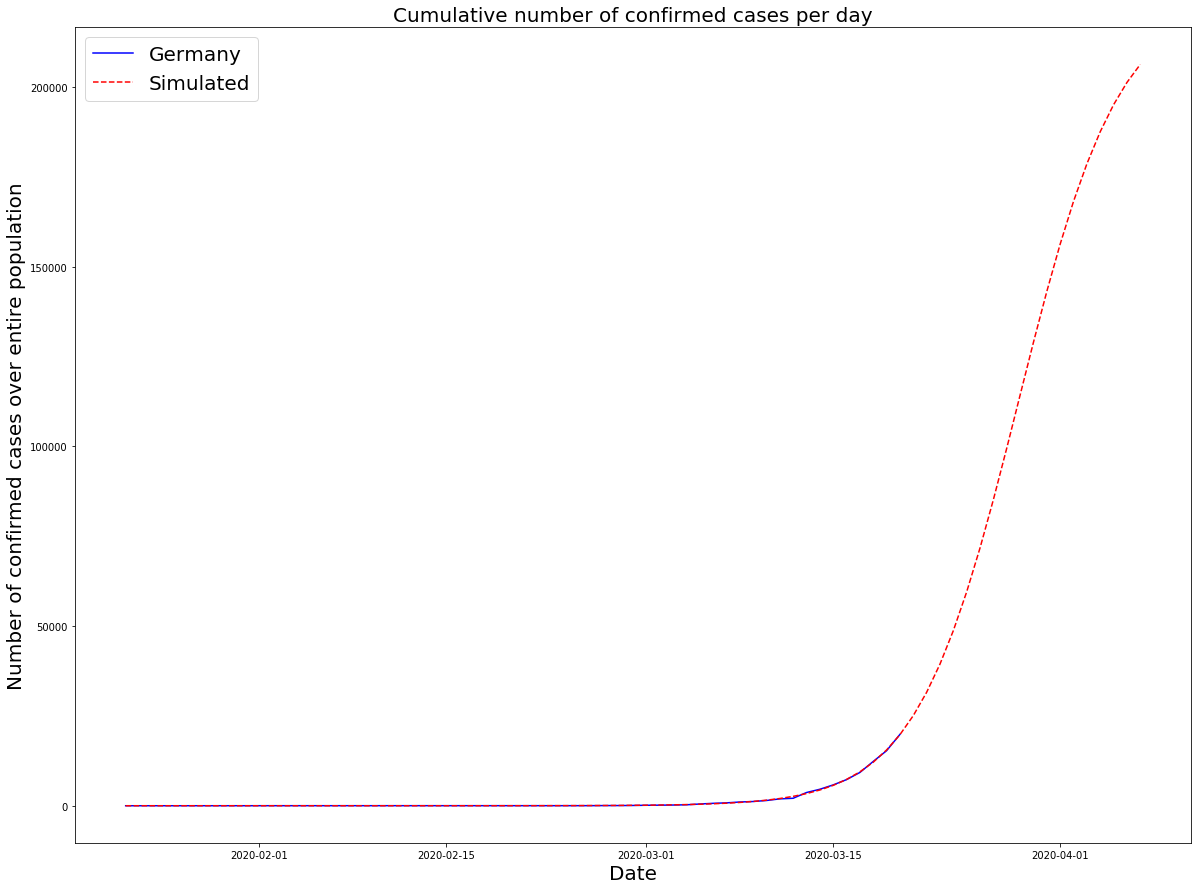

In [18]:
# Germany
example = 'Germany';
df2 = df[df['Country/Region'] == example].iloc[:, 4:].sum(axis=0);
popt2 = POPT[Pred.index[Pred['Country/Region'] == example], :];
y_fit2 = func(np.arange(len(df2)*1.3), popt2[0,0],popt2[0,1],popt2[0,2],popt2[0,3]);
p_model(df2, y_fit2, example, df2.index[0]);

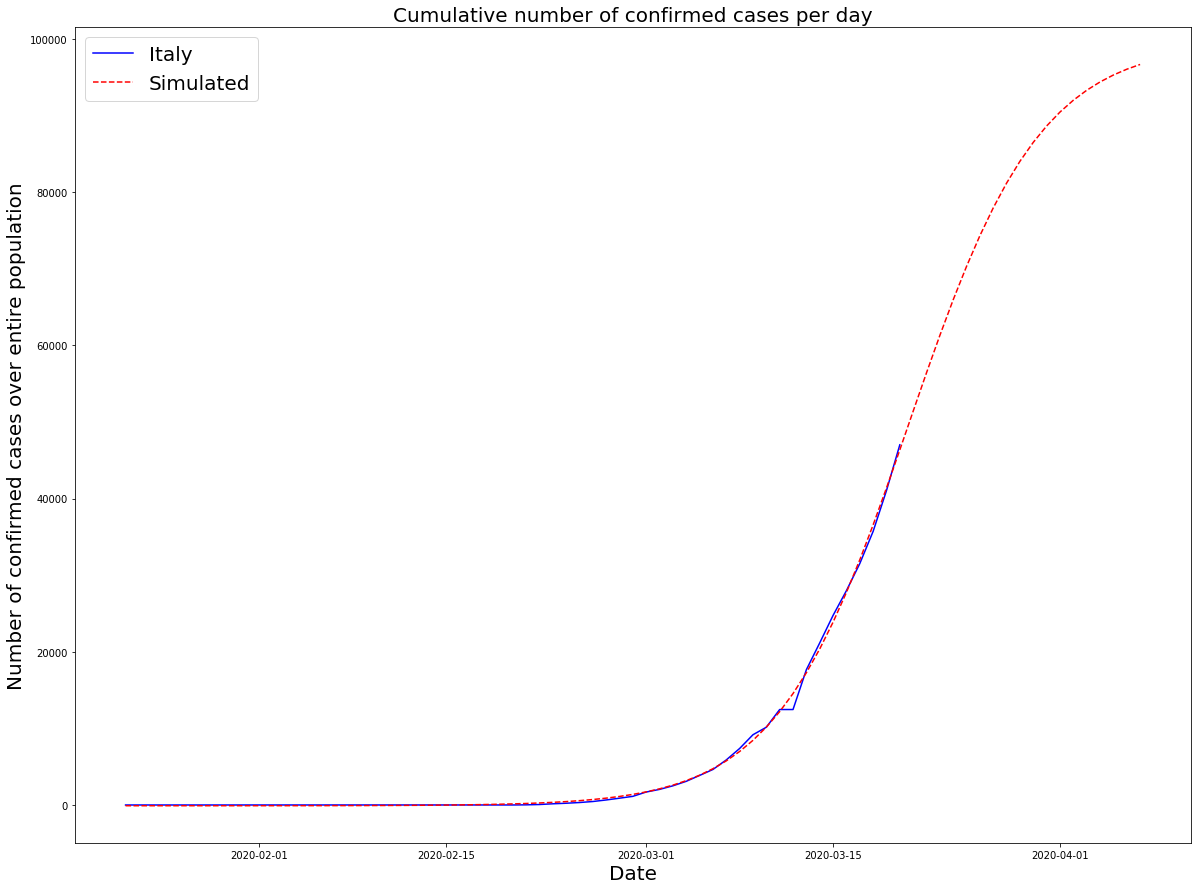

In [19]:
# Italy
example = 'Italy';
df2 = df[df['Country/Region'] == example].iloc[:, 4:].sum(axis=0);
popt2 = POPT[Pred.index[Pred['Country/Region'] == example], :];
y_fit2 = func(np.arange(len(df2)*1.3), popt2[0,0],popt2[0,1],popt2[0,2],popt2[0,3]);
p_model(df2, y_fit2, example, df2.index[0]);

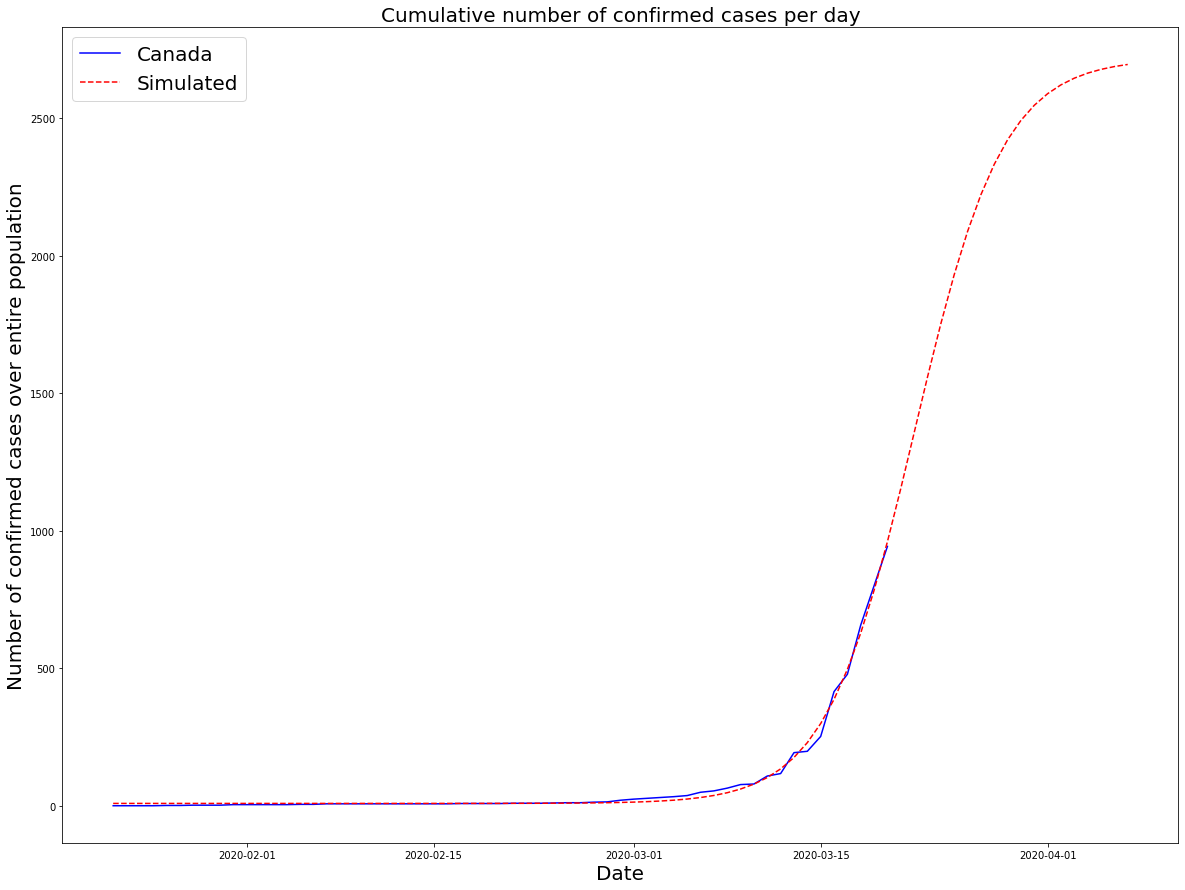

In [20]:
# Canada
example = 'Canada';
df2 = df[df['Country/Region'] == example].iloc[:, 4:].sum(axis=0);
popt2 = POPT[Pred.index[Pred['Country/Region'] == example], :];
y_fit2 = func(np.arange(len(df2)*1.3), popt2[0,0],popt2[0,1],popt2[0,2],popt2[0,3]);
p_model(df2, y_fit2, example, df2.index[0]);

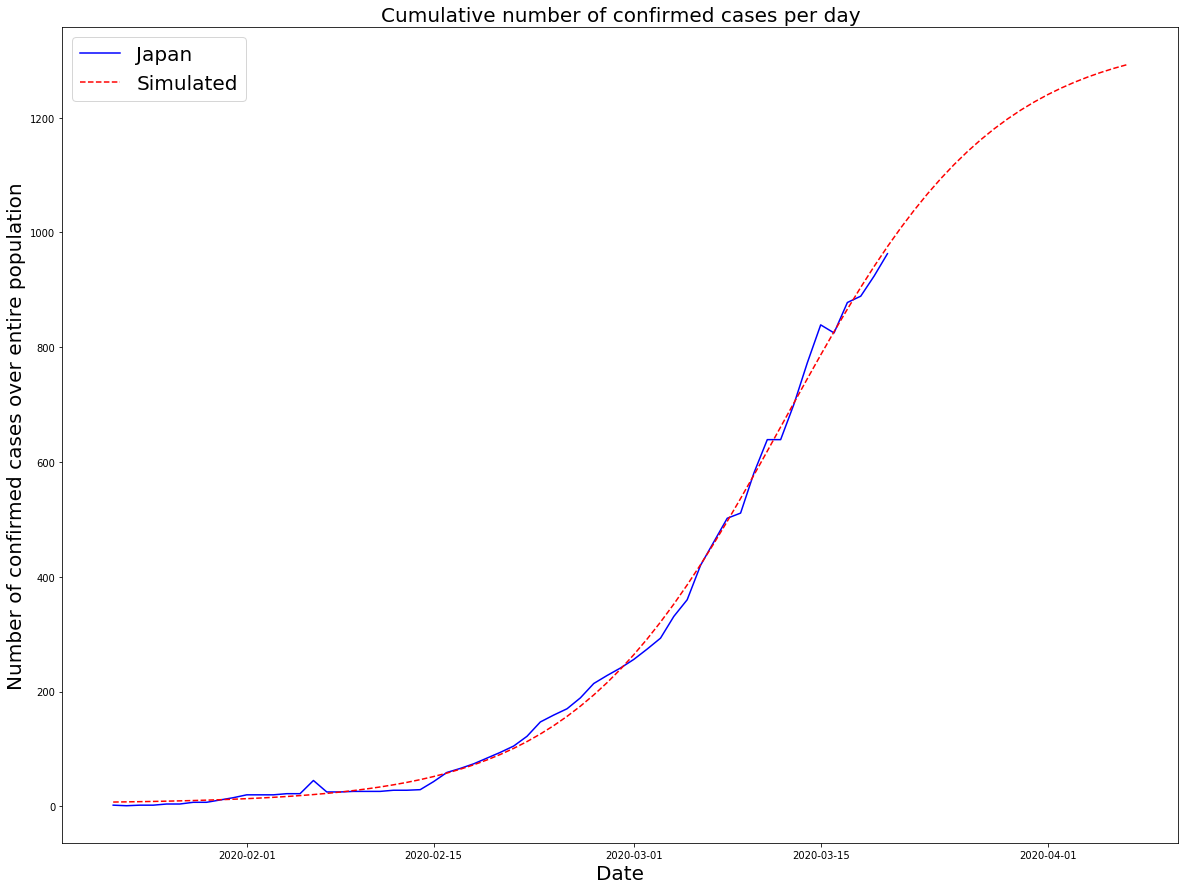

In [21]:
# Japan
example = 'Japan';
df2 = df[df['Country/Region'] == example].iloc[:, 4:].sum(axis=0);
popt2 = POPT[Pred.index[Pred['Country/Region'] == example], :];
y_fit2 = func(np.arange(len(df2)*1.3), popt2[0,0],popt2[0,1],popt2[0,2],popt2[0,3]);
p_model(df2, y_fit2, example, df2.index[0]);